In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/mamisha850/Car_Price_Prediction_Project/main/Used_Cars_Data.csv')
data.head()

,Brand,Model,Variant,Manufacturing_Year,Driven_Kilometer,Fuel,Number of Owner,Location,Price
0,Hyundai,i10,ERA 1.1 IRDE,2014,29383,Petrol,2,New Delhi,266199
1,Hyundai,i10,SPORTZ 1.2 KAPPA VTVT,2013,10558,Petrol,1,New Delhi,392199
2,Maruti,Swift,LXI,2020,10568,Petrol,1,New Delhi,592499
3,Maruti,Swift,LXI,2019,27659,Petrol,1,New Delhi,533399
4,KIA,SELTOS,HTX 1.5 PETROL MT,2020,32799,Petrol,1,New Delhi,1383099


In [3]:
data.shape

(5078, 9)

In [4]:
data.columns

Index(['Brand', 'Model', 'Variant', 'Manufacturing_Year', 'Driven_Kilometer',
       'Fuel', 'Number of Owner', 'Location', 'Price'],
      dtype='object')

In [5]:
data.isnull().sum()

Brand                 0
Model                 0
Variant               0
Manufacturing_Year    0
Driven_Kilometer      0
Fuel                  0
Number of Owner       0
Location              0
Price                 0
dtype: int64

In [6]:
data.dtypes

Brand                 object
Model                 object
Variant               object
Manufacturing_Year     int64
Driven_Kilometer       int64
Fuel                  object
Number of Owner       object
Location              object
Price                  int64
dtype: object

Six columns shows an object data type and three columns are of integer type.

Number of Owner is an integer type but shows an object

# Data Cleaning

                                            Check the data

In [7]:
data['Number of Owner'].value_counts()

1      3922
2      1063
3        91
4th       2
Name: Number of Owner, dtype: int64

In [8]:
data['Number of Owner']=data['Number of Owner'].replace('4th','4')

                                            Convert object into float

In [9]:
data['Number of Owner']=data['Number of Owner'].astype(float)

In [10]:
data['Number of Owner'].value_counts()

1.0    3922
2.0    1063
3.0      91
4.0       2
Name: Number of Owner, dtype: int64

Now the Number of Owner is an integer type

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078 entries, 0 to 5077
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               5078 non-null   object 
 1   Model               5078 non-null   object 
 2   Variant             5078 non-null   object 
 3   Manufacturing_Year  5078 non-null   int64  
 4   Driven_Kilometer    5078 non-null   int64  
 5   Fuel                5078 non-null   object 
 6   Number of Owner     5078 non-null   float64
 7   Location            5078 non-null   object 
 8   Price               5078 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 357.2+ KB


# Data Visalisation

                                 Visualisation of categorical data
    
Number of Owner is flaot type but it is discrete value
Manufacturing_Year is integer type but we can't consider as continuous data

so we consider both the columns as a nominal data    

In [12]:
data_visualization_nominal=data[['Brand','Model','Variant','Manufacturing_Year','Fuel','Location','Number of Owner']].copy()

data_visualization_nominal.columns

Index(['Brand', 'Model', 'Variant', 'Manufacturing_Year', 'Fuel', 'Location',
       'Number of Owner'],
      dtype='object')

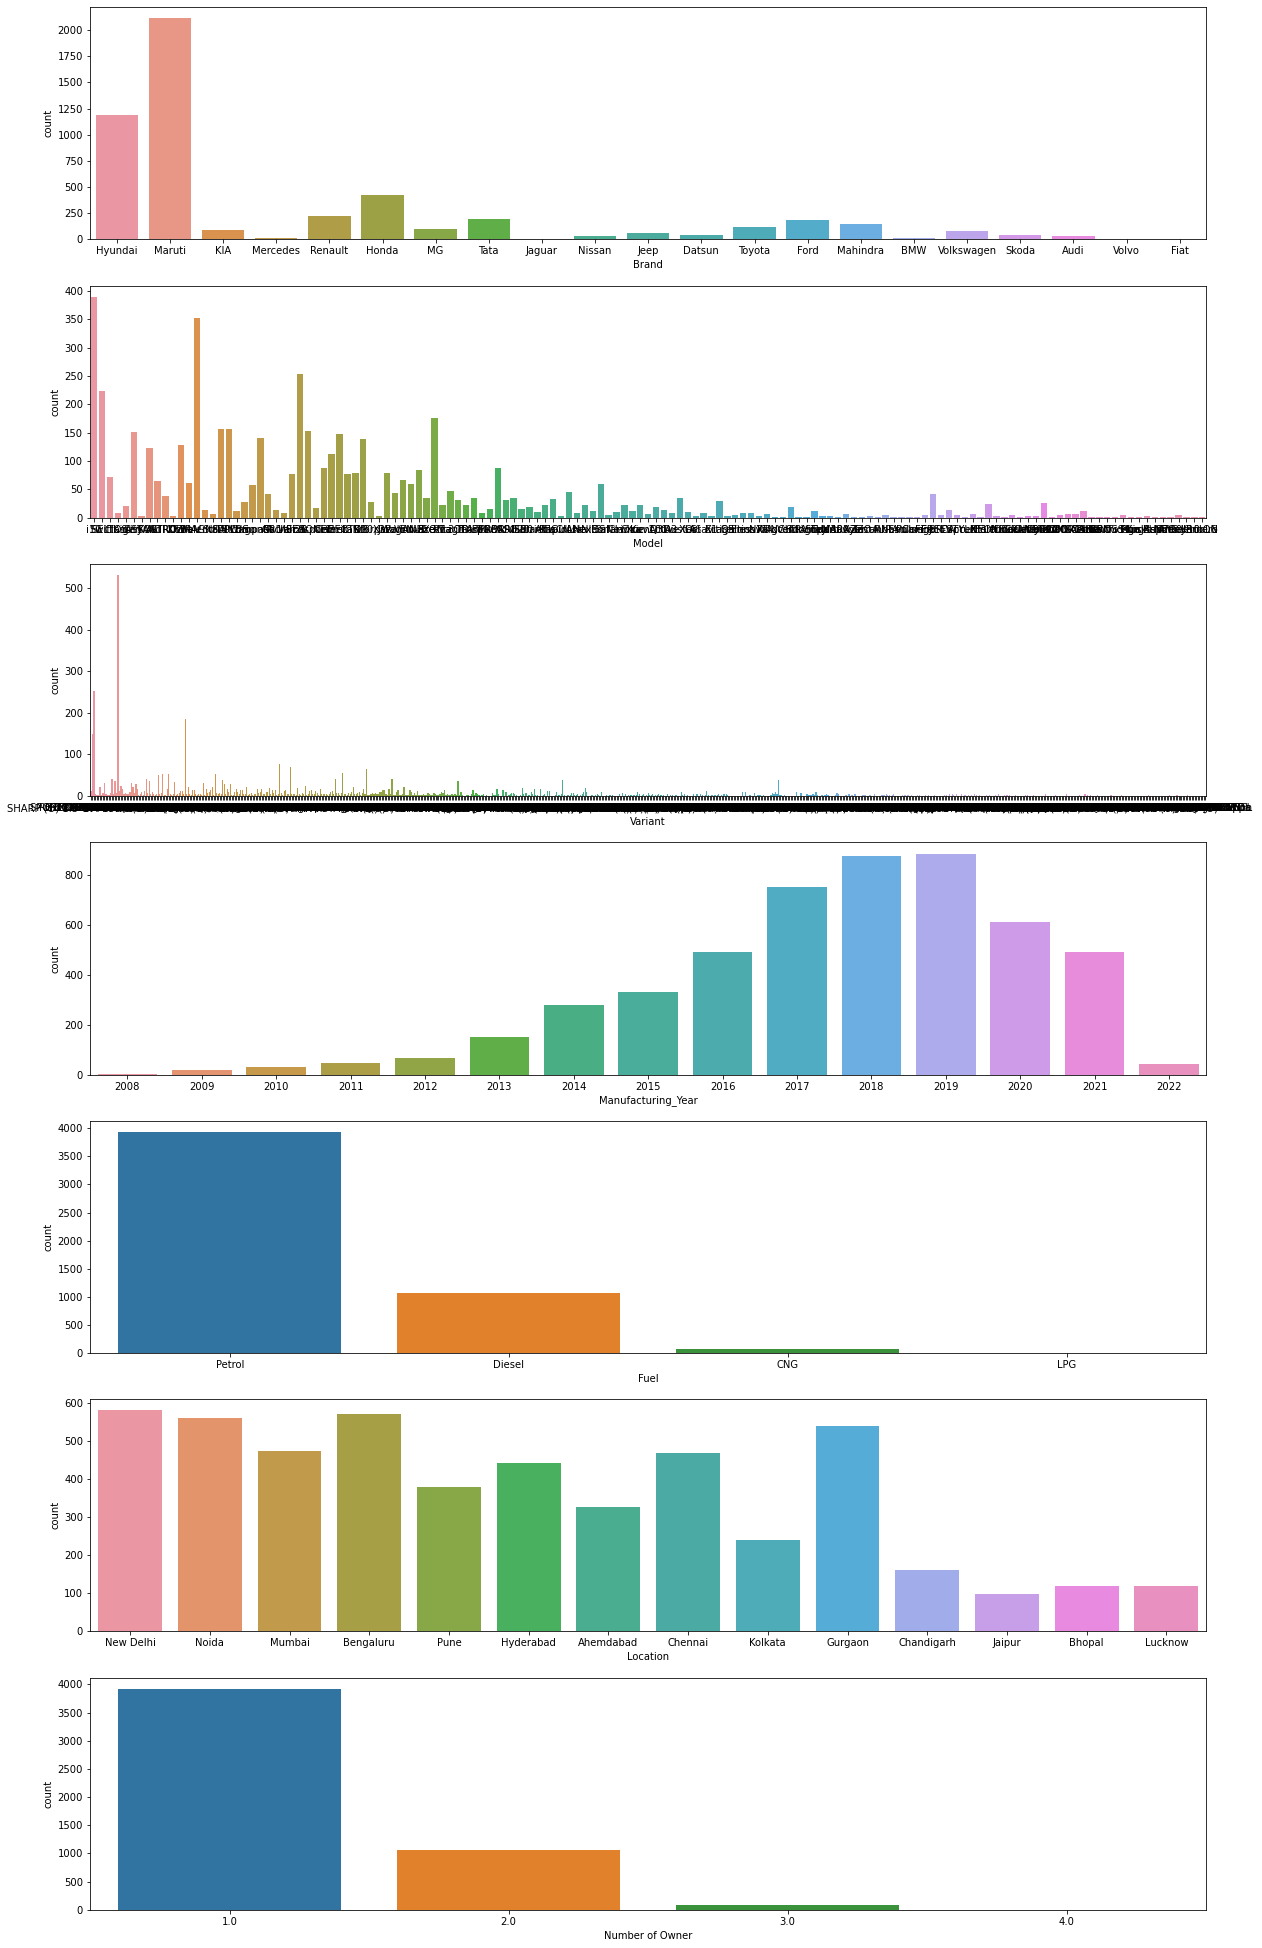

In [13]:
plt.figure(figsize=(20,35))
num =1

for column in data_visualization_nominal:
    if num <=7:
        ax = plt.subplot(7,1,num)
        sns.countplot(x=column,data=data_visualization_nominal)
        plt.xlabel(column,fontsize=10)
        
    num+=1
plt.show()  

                                     Visualisation of continuous data

In [14]:
data_visualisation_continuous=data[['Driven_Kilometer','Price']].copy()

data_visualisation_continuous.columns

Index(['Driven_Kilometer', 'Price'], dtype='object')

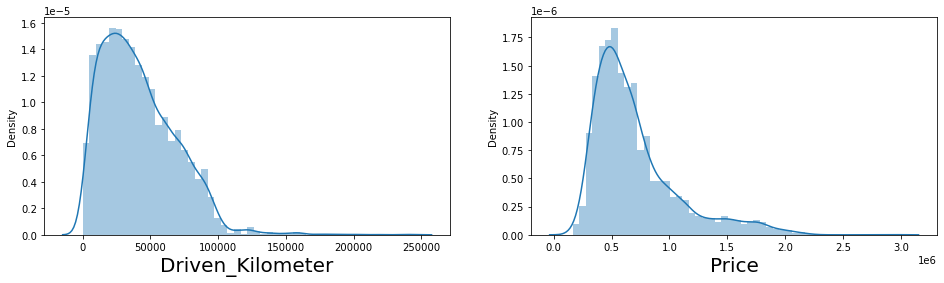

In [15]:
plt.figure(figsize=(16,4))
num =1

for column in data_visualisation_continuous:
    if num <=2:
        ax = plt.subplot(1,2,num)
        sns.distplot(data_visualisation_continuous[column])
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()    

                                        Encoding Technique
    
Convert object data type into float data type

In [16]:
enc=OrdinalEncoder()

for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [17]:
data.head()

,Brand,Model,Variant,Manufacturing_Year,Driven_Kilometer,Fuel,Number of Owner,Location,Price
0,6.0,138.0,283.0,2014,29383,3.0,2.0,11.0,266199
1,6.0,138.0,501.0,2013,10558,3.0,1.0,11.0,392199
2,12.0,109.0,379.0,2020,10568,3.0,1.0,11.0,592499
3,12.0,109.0,379.0,2019,27659,3.0,1.0,11.0,533399
4,9.0,99.0,347.0,2020,32799,3.0,1.0,11.0,1383099


# Data Analysis

                                 Describe the Descriptive statistics 

In [18]:
data.describe()

,Brand,Model,Variant,Manufacturing_Year,Driven_Kilometer,Fuel,Number of Owner,Location,Price
count,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5.078000e+03
mean,9.987790,69.961796,406.237495,2017.606341,41430.054943,2.534659,1.246357,6.885585,6.991051e+05
std,4.041766,45.330851,210.327846,2.423706,27380.534490,0.871201,0.473195,4.227305,3.662243e+05
min,0.000000,0.000000,0.000000,2008.000000,72.000000,0.000000,1.000000,0.000000,1.643990e+05
25%,6.000000,30.000000,230.000000,2016.000000,20104.750000,3.000000,1.000000,4.000000,4.485490e+05
50%,12.000000,65.000000,432.000000,2018.000000,36725.000000,3.000000,1.000000,6.000000,5.984990e+05
75%,12.000000,117.000000,584.000000,2019.000000,59040.750000,3.000000,1.000000,11.000000,8.224990e+05
max,20.000000,140.000000,744.000000,2022.000000,242597.000000,3.000000,4.000000,13.000000,2.952199e+06


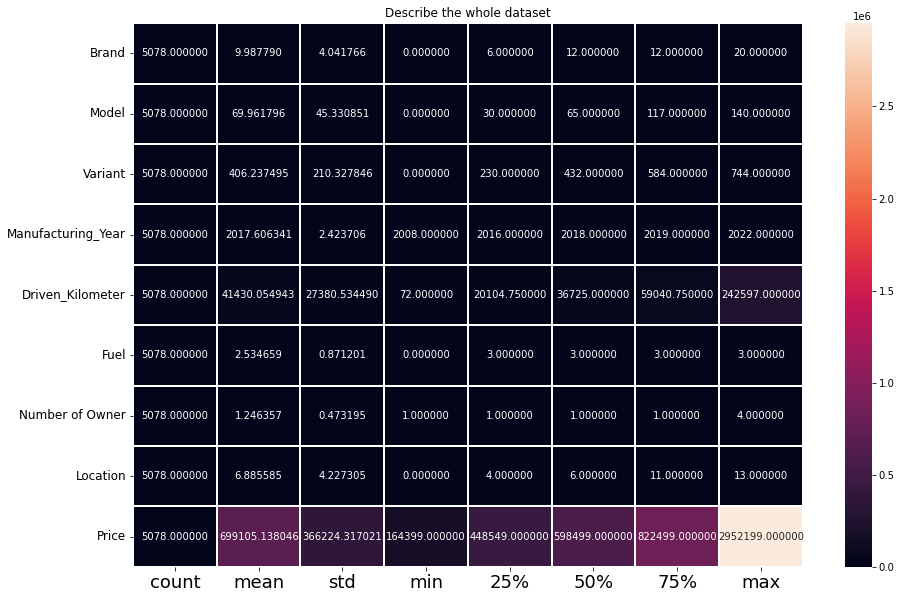

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(data.describe().transpose(),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Describe the whole dataset")
plt.show()

                                           Correlation

In [20]:
data.corr()

,Brand,Model,Variant,Manufacturing_Year,Driven_Kilometer,Fuel,Number of Owner,Location,Price
Brand,1.000000,-0.142697,0.227147,0.118702,-0.025650,-0.004019,-0.056821,0.015481,-0.042454
Model,-0.142697,1.000000,-0.006937,-0.121328,0.017157,0.059350,0.032871,-0.026428,-0.024655
Variant,0.227147,-0.006937,1.000000,-0.002993,-0.006394,0.026659,-0.035918,-0.019490,-0.121390
Manufacturing_Year,0.118702,-0.121328,-0.002993,1.000000,-0.530140,0.096899,-0.246368,-0.003974,0.398371
Driven_Kilometer,-0.025650,0.017157,-0.006394,-0.530140,1.000000,-0.353135,0.111600,-0.020686,-0.144403
Fuel,-0.004019,0.059350,0.026659,0.096899,-0.353135,1.000000,0.001023,-0.112707,-0.272635
Number of Owner,-0.056821,0.032871,-0.035918,-0.246368,0.111600,0.001023,1.000000,-0.064679,-0.123844
Location,0.015481,-0.026428,-0.019490,-0.003974,-0.020686,-0.112707,-0.064679,1.000000,0.058403
Price,-0.042454,-0.024655,-0.121390,0.398371,-0.144403,-0.272635,-0.123844,0.058403,1.000000


<AxesSubplot:>

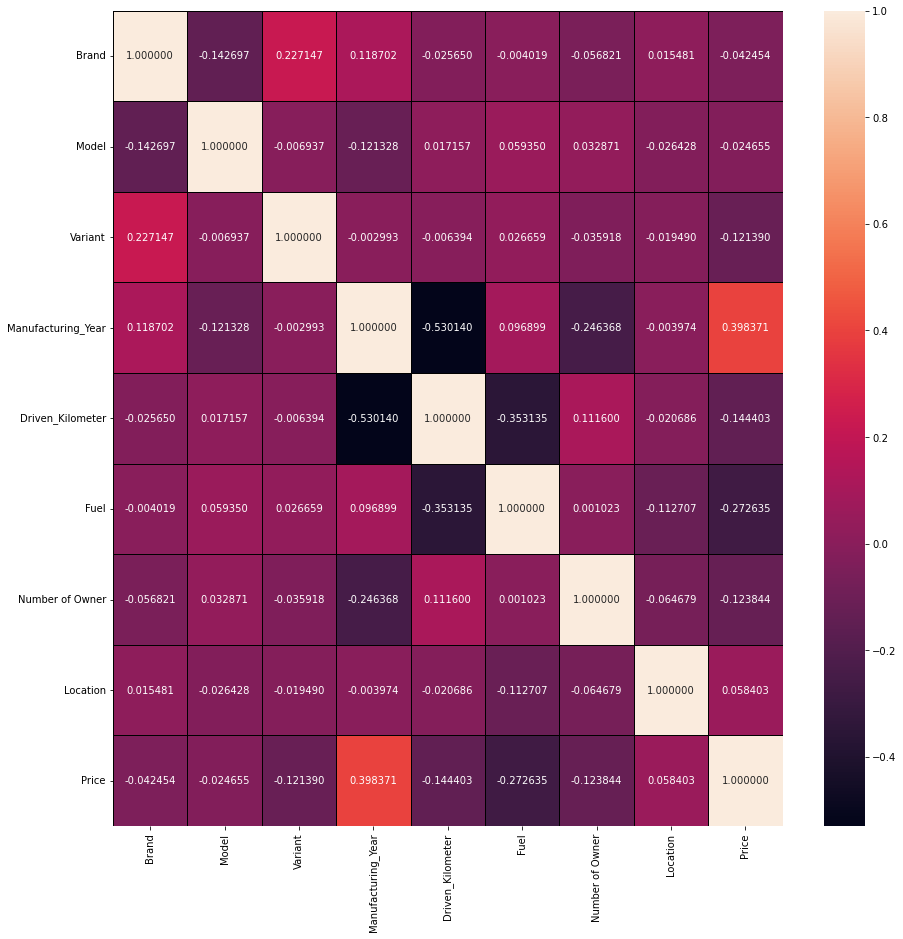

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='f')

The Manufacturing_year column having higher correlation with the target variable which is 39% but it is not a good correlation.

There is no higher relation between one independent variable with another independent variable 

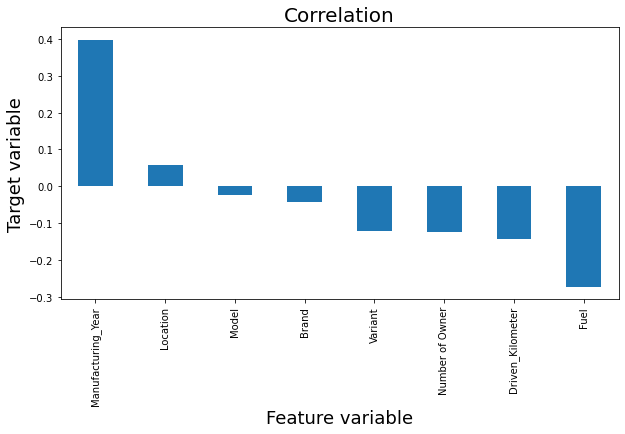

In [22]:
plt.figure(figsize=(10,5))
data.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar')
plt.xlabel('Feature variable',fontsize=18)
plt.ylabel('Target variable',fontsize=18)
plt.title('Correlation',fontsize=20)
plt.show()

The correlation between independent and the dependent variable:

    * Brand has 4% correlation with the target variable.
    * Model has 2% correlation with the target variable.
    * Variant has 12% correlation with the target variable.
    * Manufacturing_Year has 39% correlation with the target variable.
    * Driven_Kilometer has 14% correlation with the target variable.
    * Fuel has 27% correlation with the target variable.
    * Number of Owner has 12% correlation with the target variable.
    * Location has 5% correlation with the target variable.
   

                                                Outliers

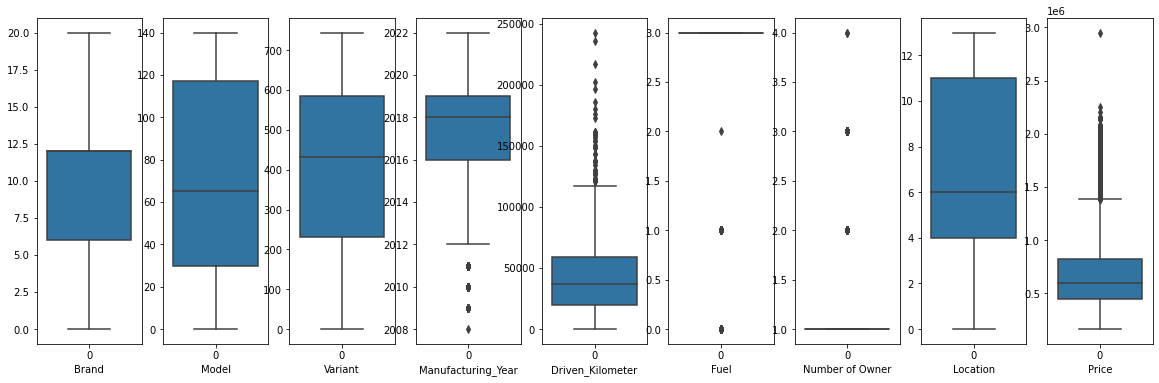

In [23]:
plt.figure(figsize=(20,6))
number = 1

for column in data:
    if number <=9:
        plt.subplot(1,9,number)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=10)
       
    number+=1
plt.show()    

Outliers are consider only on continuous data, so the columns is:
    
    * Driven_Kilometer

                                          Skewness

In [24]:
data.skew()

Brand                 0.030225
Model                 0.182556
Variant              -0.300468
Manufacturing_Year   -0.748359
Driven_Kilometer      1.063761
Fuel                 -1.399943
Number of Owner       1.727469
Location             -0.113658
Price                 1.544330
dtype: float64

Skewness is consider only on continuous data
Take threshold range of skewness is (-0.5,0.5)

The columns in which skewness is present:
    
    * Driven_Kilometer

                                           Removing Outliers

In [25]:
x = data.drop(['Price'],axis=1)
y = data['Price']

z=np.abs(zscore(x))
threshold=3
print(np.where(z>3))

(array([  26,   28,   31,   46,   50,   58,   92,  122,  124,  355,  376,
        396,  451,  454,  474,  586,  588,  625,  639,  686,  699,  716,
        793,  813,  936,  970, 1016, 1037, 1039, 1095, 1230, 1283, 1291,
       1295, 1327, 1347, 1396, 1562, 1612, 1614, 1615, 1617, 1619, 1620,
       1627, 1628, 1634, 1638, 1662, 1664, 1666, 1685, 1715, 1723, 1735,
       1736, 1746, 1760, 1761, 1762, 1769, 1783, 1796, 1810, 1820, 1830,
       1881, 1895, 1961, 1964, 2007, 2084, 2102, 2148, 2150, 2151, 2152,
       2170, 2172, 2174, 2184, 2186, 2249, 2306, 2321, 2329, 2415, 2474,
       2521, 2546, 2554, 2565, 2566, 2572, 2575, 2583, 2599, 2612, 2614,
       2625, 2630, 2640, 2648, 2669, 2670, 2720, 2720, 2725, 2735, 2761,
       2817, 2933, 2971, 2974, 2979, 2980, 2986, 3032, 3101, 3119, 3257,
       3319, 3339, 3341, 3346, 3350, 3382, 3401, 3420, 3437, 3447, 3463,
       3508, 3531, 3568, 3664, 3688, 3690, 3788, 3789, 3794, 3838, 3858,
       3859, 3895, 3899, 4043, 4056, 4080, 4081, 4

zscore removes the Outliers from Number of Owner, so we do not remove them and conside the orignal data

                                       Removing Skewness

In [26]:
# take Square root of right skewed data
data["Driven_Kilometer"]=np.sqrt(data["Driven_Kilometer"])

In [27]:
data.skew()

Brand                 0.030225
Model                 0.182556
Variant              -0.300468
Manufacturing_Year   -0.748359
Driven_Kilometer      0.077552
Fuel                 -1.399943
Number of Owner       1.727469
Location             -0.113658
Price                 1.544330
dtype: float64

Now there is no skeness in the dataset.

The data is ready for the model fiting.

In [28]:
data.head()

,Brand,Model,Variant,Manufacturing_Year,Driven_Kilometer,Fuel,Number of Owner,Location,Price
0,6.0,138.0,283.0,2014,171.414702,3.0,2.0,11.0,266199
1,6.0,138.0,501.0,2013,102.752129,3.0,1.0,11.0,392199
2,12.0,109.0,379.0,2020,102.800778,3.0,1.0,11.0,592499
3,12.0,109.0,379.0,2019,166.309952,3.0,1.0,11.0,533399
4,9.0,99.0,347.0,2020,181.104942,3.0,1.0,11.0,1383099


# Model Fitting

In [29]:
x=data.drop(['Price'],axis=1)
y=data['Price']

                                            Linear Regression

In [30]:
lr=LinearRegression()

In [31]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",r2_score(y_train,pred_train)*100)
    print("Testing accuracy score:",r2_score(y_test,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 27.518252579185965
Testing accuracy score: 28.312255398064234


The model perform very well
random state 1
Training accuracy score: 28.715316116594437
Testing accuracy score: 23.080130916984942


The model perform very well
random state 2
Training accuracy score: 28.594314927983678
Testing accuracy score: 24.189232412566064


The model perform very well
random state 3
Training accuracy score: 27.2561890305416
Testing accuracy score: 29.01787852964215


The model perform very well
random state 4
Training accuracy score: 28.55477764431338
Testing accuracy score: 24.21208496424355


The model perform very well
random state 5
Training accuracy score: 27.53606939234605
Testing accuracy score: 28.42422918183367


The model perform very well
random state 6
Training accuracy score: 27.608587045344855
Testing accuracy score: 27.831729077374423


The model perform very well
random state 7
Training accuracy score: 26.863615946337

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [33]:
pred_test=lr.predict(x_test)
accuracy=r2_score(y_test,pred_test)*100
print("R square score for testing",accuracy)

R square score for testing 27.903226807274038


In [34]:
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.18300822297316227


At cross fold 3 the cv score is 0.2465199643582586


At cross fold 4 the cv score is 0.24349588573967562


At cross fold 5 the cv score is 0.2572503738953529


At cross fold 6 the cv score is 0.25404850440025945


At cross fold 7 the cv score is 0.2476696310004422


At cross fold 8 the cv score is 0.2392724860893397


At cross fold 9 the cv score is 0.24962283689616527




In [35]:
lrscore=cross_val_score(lr,x,y,cv=5)
lrc=lrscore.mean()
print('cross val score:',lrc*100)

cross val score: 25.725037389535288


In [36]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 214364.34315141593
Mean square error: 86350410040.77798
Root mean square error: 293854.40279291035


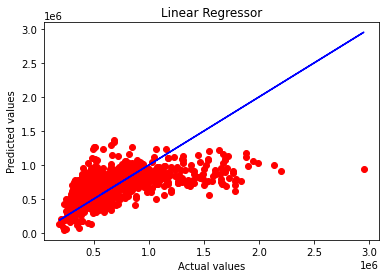

In [37]:
plt.figure(figsize=(6,4))
plt.scatter(y_test,pred_test,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regressor')                                                                                
plt.show()

                                       Decision Tree Regressor

In [38]:
dtr=DecisionTreeRegressor()

In [39]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = i)
    dtr.fit(x_train,y_train)
    pred_train=dtr.predict(x_train)
    pred_test=dtr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",r2_score(y_train,pred_train)*100)
    print("Testing accuracy score:",r2_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 100.0
Testing accuracy score: 73.30529725908862


random state 1
Training accuracy score: 100.0
Testing accuracy score: 68.925874750948


random state 2
Training accuracy score: 100.0
Testing accuracy score: 75.58784712639181


random state 3
Training accuracy score: 100.0
Testing accuracy score: 73.22244856518385


random state 4
Training accuracy score: 100.0
Testing accuracy score: 78.11914337792703


random state 5
Training accuracy score: 100.0
Testing accuracy score: 76.45419582214895


random state 6
Training accuracy score: 100.0
Testing accuracy score: 73.80732723525088


random state 7
Training accuracy score: 100.0
Testing accuracy score: 74.45282100246409


random state 8
Training accuracy score: 100.0
Testing accuracy score: 74.07852315954335


random state 9
Training accuracy score: 100.0
Testing accuracy score: 69.34661176776184


random state 10
Training accuracy score: 100.0
Testing accuracy score: 70.12123670943042


random stat

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state =38)

In [41]:
pred_test=dtr.predict(x_test)
dtrs=r2_score(y_test,pred_test)
print("R2 score:",dtrs*100)

R2 score: 93.96083785256997


In [42]:
for j in range(2,10):
    cv_score=cross_val_score(dtr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.44889843188233003


At cross fold 3 the cv score is 0.610347091763422


At cross fold 4 the cv score is 0.5416279614743778


At cross fold 5 the cv score is 0.5695864098104747


At cross fold 6 the cv score is 0.6032616775159213


At cross fold 7 the cv score is 0.6620702760841962


At cross fold 8 the cv score is 0.6383898083650164


At cross fold 9 the cv score is 0.6390949986487922




In [43]:
dtrscore=cross_val_score(dtr,x,y,cv=7)
dtrc=dtrscore.mean()
print('cross val score:',dtrc*100)

cross val score: 65.67674001672786


In [44]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 20801.574803149608
Mean square error: 8210956587.746063
Root mean square error: 90614.32882136281


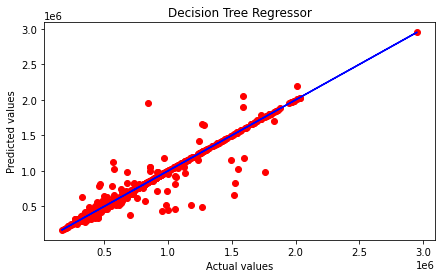

In [45]:
plt.figure(figsize=(7,4))
plt.scatter(y_test,pred_test,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Decision Tree Regressor')                                                                                
plt.show()

                                       Random Forest Regressor

In [46]:
rfr=RandomForestRegressor()

In [47]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = i)
    rfr.fit(x_train,y_train)
    pred_train=rfr.predict(x_train)
    pred_test=rfr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",r2_score(y_train,pred_train)*100)
    print("Testing accuracy score:",r2_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 97.96496751109154
Testing accuracy score: 85.23410745752594


random state 1
Training accuracy score: 97.89131969711265
Testing accuracy score: 86.65733987281948


random state 2
Training accuracy score: 97.93196126115303
Testing accuracy score: 83.54920894410046


random state 3
Training accuracy score: 97.8128900711591
Testing accuracy score: 86.78471057577137


random state 4
Training accuracy score: 98.02686491852646
Testing accuracy score: 85.78366031418848


random state 5
Training accuracy score: 97.77121155452842
Testing accuracy score: 88.24565862600055


random state 6
Training accuracy score: 97.76172912533102
Testing accuracy score: 86.62406204414755


random state 7
Training accuracy score: 98.04289201349582
Testing accuracy score: 87.08229138252784


random state 8
Training accuracy score: 98.06307091901051
Testing accuracy score: 87.87162521963798


random state 9
Training accuracy score: 97.8203398678293
Testing accuracy score: 80

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state =12)

In [49]:
preds_test=rfr.predict(x_test)
rfrs=r2_score(y_test,preds_test)
print("R2 score for testing:",rfrs*100)

R2 score for testing: 96.28400745545888


In [50]:
for j in range(2,10):
    cv_score=cross_val_score(rfr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.6850549843401421


At cross fold 3 the cv score is 0.7739142300384348


At cross fold 4 the cv score is 0.7545634539698945


At cross fold 5 the cv score is 0.7822327040411322


At cross fold 6 the cv score is 0.7984438852019236


At cross fold 7 the cv score is 0.8032050088719737


At cross fold 8 the cv score is 0.8127692804022948


At cross fold 9 the cv score is 0.8153980673160723




In [51]:
rfrscore=cross_val_score(rfr,x,y,cv=9)
rfrc=rfrscore.mean()
print('cross val score:',rfrc*100)

cross val score: 81.20064648139179


In [52]:
mae=mean_absolute_error(y_test,preds_test)
mse=mean_squared_error(y_test,preds_test)
rmse=np.sqrt(mean_squared_error(y_test,preds_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 33256.82393700788
Mean square error: 5105908706.830263
Root mean square error: 71455.64153256385


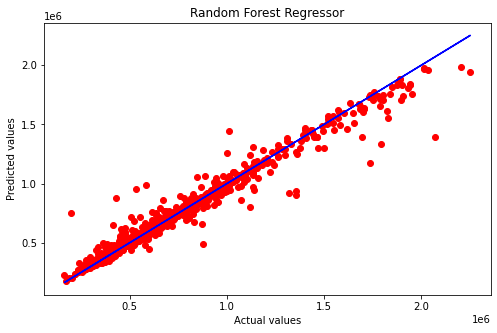

In [53]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_test,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest Regressor')                                                                                
plt.show()

                                           Gradient Boosting Regressor

In [54]:
gb= GradientBoostingRegressor()

In [55]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = i)
    gb.fit(x_train,y_train)
    pred_train=gb.predict(x_train)
    pred_test=gb.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",r2_score(y_train,pred_train)*100)
    print("Testing accuracy score:",r2_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 82.8438599165959
Testing accuracy score: 79.85501161888828


random state 1
Training accuracy score: 81.62265403883339
Testing accuracy score: 80.29211782492497


random state 2
Training accuracy score: 81.29580534876261
Testing accuracy score: 75.10526938613471


random state 3
Training accuracy score: 81.65962993068739
Testing accuracy score: 78.67641514201641


random state 4
Training accuracy score: 81.7383921279074
Testing accuracy score: 78.99915048381465


random state 5
Training accuracy score: 81.80404428807934
Testing accuracy score: 81.68953581312368


random state 6
Training accuracy score: 82.69828381394827
Testing accuracy score: 78.15910814674433


random state 7
Training accuracy score: 82.39073072611991
Testing accuracy score: 78.81722196933418


random state 8
Training accuracy score: 80.22765138248417
Testing accuracy score: 79.09731079446885


random state 9
Training accuracy score: 83.17041857730524
Testing accuracy score: 74

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 5)

In [57]:
pred_test=gb.predict(x_test)
accuracy=r2_score(y_test,pred_test)*100
print("R square score",accuracy)

R square score 82.93977308028634


In [58]:
for j in range(2,10):
    cv_score=cross_val_score(gb,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.6194014265136201


At cross fold 3 the cv score is 0.7091830867402166


At cross fold 4 the cv score is 0.7342791473883862


At cross fold 5 the cv score is 0.7455604202561172


At cross fold 6 the cv score is 0.7454694630543107


At cross fold 7 the cv score is 0.7456130667476498


At cross fold 8 the cv score is 0.7519129811553894


At cross fold 9 the cv score is 0.7498617394735414




In [59]:
gbscore=cross_val_score(gb,x,y,cv=8)
gbc=gbscore.mean()
print('cross val score:',gbc*100)

cross val score: 75.20991324700115


In [60]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 98242.59609002623
Mean square error: 21093536531.11875
Root mean square error: 145236.14058187703


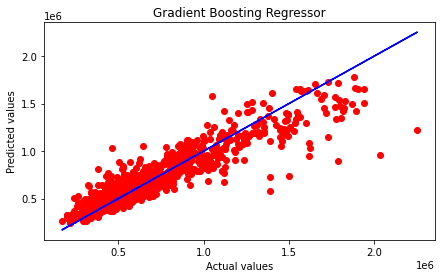

In [62]:
plt.figure(figsize=(7,4))
plt.scatter(y_test,pred_test,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Gradient Boosting Regressor')                                                                                
plt.show()

Linear Regression is very poor model for the prediction. Decision Tree, Random Forest and Gradient Boosting are the better models.
Decision Tree and Random Forest gives above 90% score but in Decision tree some of the values are large deviated.

So from these two models Random Forest Regressor is the better one for the Car Price Prediction because this model have higher r2_score(ie.96), least mean square error and less deviation in actual and predicted value. So we do not require to Tune the parameter and check the r2_score again. 


# Random Forest Regression

                          

                                      Conclusion given by selected model

In [63]:
Prediction=pd.DataFrame({"Actual_value":y_test,"Predicted_value":preds_test})
Prediction

,Actual_value,Predicted_value
4497,457499,413022.4
4129,1890299,428290.0
2894,528999,1086056.0
1190,625599,793258.0
1925,419399,640317.0
...,...,...
444,501899,986785.5
3698,540299,668575.0
4099,834099,545845.5
169,457499,484407.0
